In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots

First Analysis of how quasi thresholding does on its own

In [2]:
epi_ar_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\auto_reject\0")
epi_ar_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\auto_reject\1")

In [3]:
epi_ar_ec_results = np.zeros(
    (   
        16,
        5,
        2,
        5
    )
)

In [4]:
epi_ar_eo_results = np.zeros(
    (   
        16,
        5,
        2,
        5
    )
)

In [5]:
for i, pth in enumerate(epi_ar_ec_folder.iterdir()):
    current = np.load(pth)
    epi_ar_ec_results[i, :, :, :] = current.copy()

In [6]:
for i, pth in enumerate(epi_ar_eo_folder.iterdir()):
    current = np.load(pth)
    epi_ar_eo_results[i, :, :, :] = current.copy()

In [31]:
epi_ar_results = epi_ar_ec_results#.__add__(epi_ar_ec_results)/2

In [32]:
srm_ar_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\auto_reject")

In [33]:
srm_ar_results = np.zeros(
    (   
        16,
        5,
        2,
        5
    )
)

In [34]:
for i, pth in enumerate(srm_ar_folder.iterdir()):
    current = np.load(pth)
    srm_ar_results[i, :, :, :] = current.copy()

In [35]:
spis_ar_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\auto_reject")

In [36]:
spis_ar_results = np.zeros(
    (   
        16,
        5,
        2,
        5
    )
)

In [37]:
for i, pth in enumerate(spis_ar_folder.iterdir()):
    current = np.load(pth)
    spis_ar_results[i, :, :, :] = current.copy()

In [38]:
ar_results = np.zeros(
    (   
        48,
        5,
        2,
        5
    )
)

In [39]:
ar_results[0:16, :, :, :] = epi_ar_results
ar_results[16:32, :, :, :] = srm_ar_results
ar_results[32:48, :, :, :] = spis_ar_results

In [40]:
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 0], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 1], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 2], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 3], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 4], 0)), (5, 2)))

(4, 1)
(1, 1)
(3, 1)
(4, 0)
(2, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

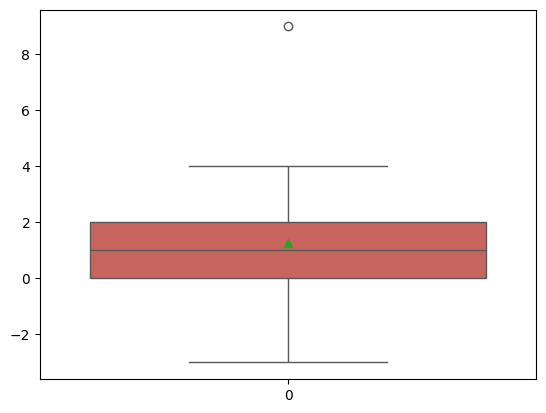

In [41]:
plot_n_boxplots([ar_results[:, 1, 1, 1].flatten()], [sns.xkcd_rgb["pale red"]])

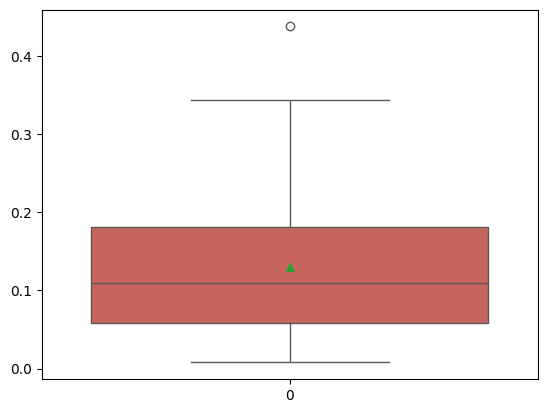

In [42]:
plot_n_boxplots([ar_results[:, 1, 1, 0].flatten()], [sns.xkcd_rgb["pale red"]])

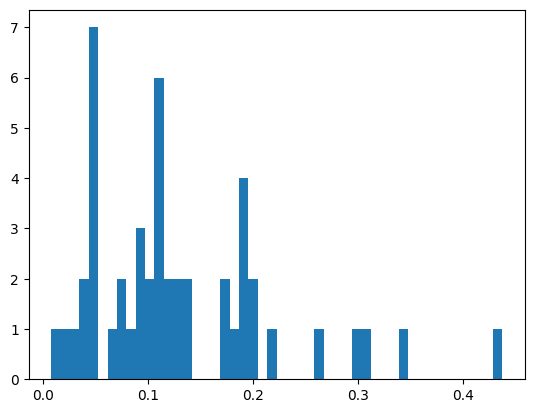

In [56]:
plt.hist([ar_results[:, 1, 1, 0].flatten()], bins=48)
plt.show()

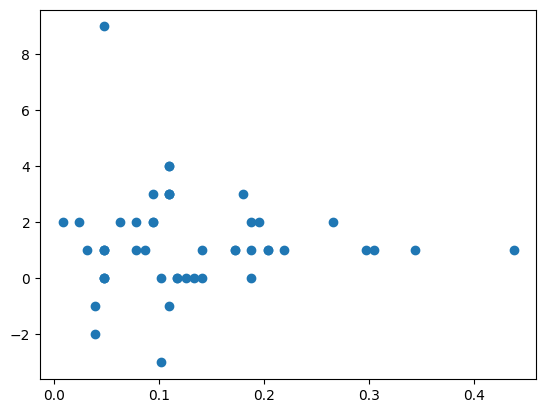

In [57]:
plt.scatter(ar_results[:, 1, 1, 0].flatten(), ar_results[:, 1, 1, 1].flatten())

Compared to the other thresholds

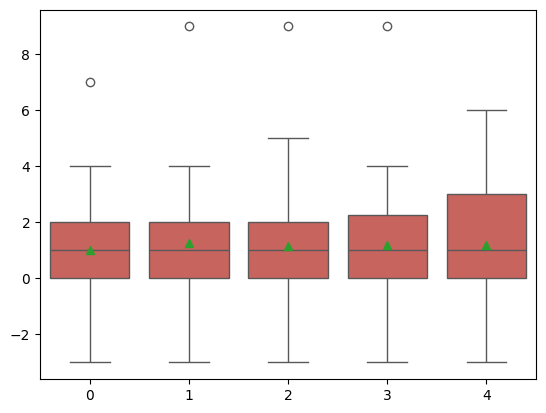

In [43]:
plot_n_boxplots([ar_results[:, 0, 1, 1].flatten(), ar_results[:, 1, 1, 1].flatten(), ar_results[:, 2, 1, 1].flatten(), ar_results[:, 3, 1, 1].flatten(), ar_results[:, 4, 1, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to not av_ref

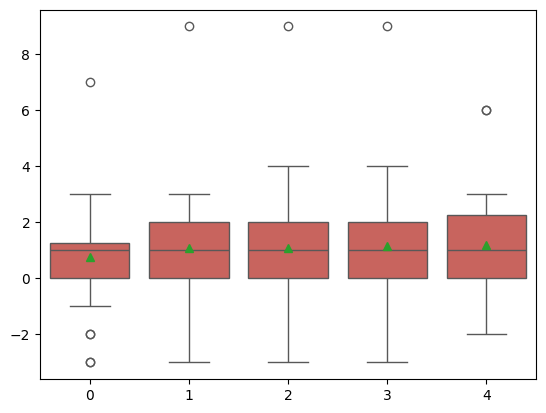

In [44]:
plot_n_boxplots([ar_results[:, 0, 0, 1].flatten(), ar_results[:, 1, 0, 1].flatten(), ar_results[:, 2, 0, 1].flatten(), ar_results[:, 3, 0, 1].flatten(), ar_results[:, 4, 0, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [45]:
print(ar_results[:, 4, 1, 1].flatten())

[ 0. -1. -1. -2.  4.  0.  4. -1.  0.  2.  1.  3. -3. -2.  0.  1.  1.  2.
  3.  3.  1.  1.  2.  0.  3. -1.  3.  0.  0.  2.  3.  6.  0.  0.  3.  3.
  0.  3.  4.  3.  0. -1.  0.  3.  0.  3.  3.  0.]


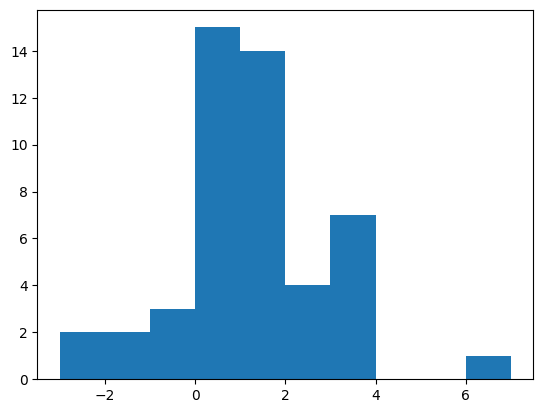

In [46]:
plt.hist(ar_results[:, 0, 0, 1])
plt.show()

In [47]:
t_statistic, p_value = stats.ttest_1samp(a=ar_results[:, 4, 1, 1], popmean=0) 
print(t_statistic , p_value)

4.351968090161772 7.228007569033355e-05


Investigating the statisitcs of itteration maximazing the average number of biological components.

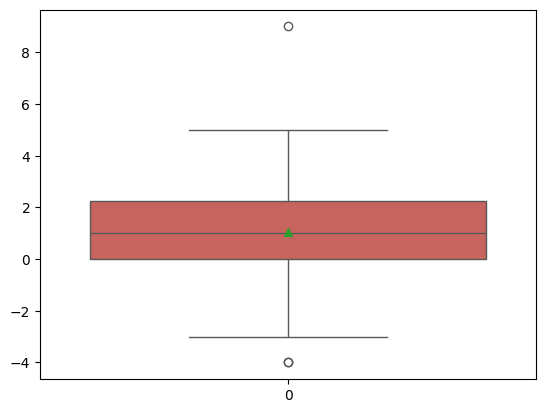

In [61]:
plot_n_boxplots([ar_results[:, 3, 1, 2].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:111: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


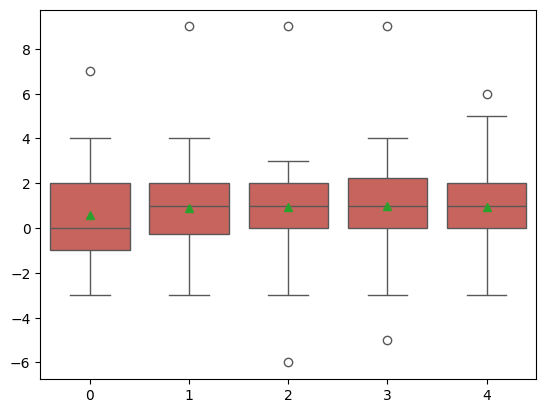

In [49]:
plot_n_boxplots([ar_results[:, 0, 0, 2].flatten(), ar_results[:, 1, 0, 2].flatten(), ar_results[:, 2, 0, 2].flatten(), ar_results[:, 3, 0, 2].flatten(), ar_results[:, 4, 0, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to av_ref

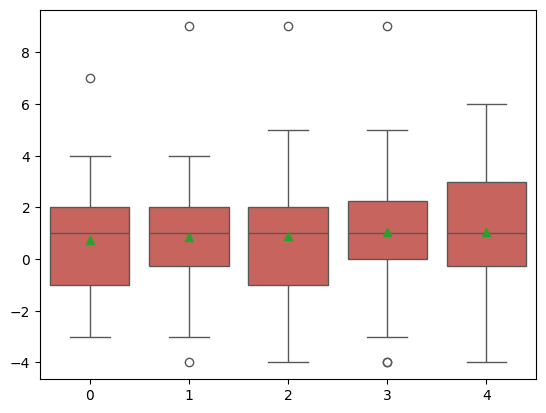

In [50]:
plot_n_boxplots([ar_results[:, 0, 1, 2].flatten(), ar_results[:, 1, 1, 2].flatten(), ar_results[:, 2, 1, 2].flatten(), ar_results[:, 3, 1, 2].flatten(), ar_results[:, 4, 1, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [51]:
print(ar_results[:, 4, 0, 2].flatten())

[-3.  1.  1.  2.  0. -1.  3.  0.  0. -3.  0.  2. -3. -1.  0.  1. -1.  2.
  3.  2.  2.  0.  1. -1.  1. -2.  3.  2.  1.  5.  4.  6.  0.  0.  3.  3.
  2.  3.  3.  1.  0. -1.  0.  5. -1. -1.  2.  0.]


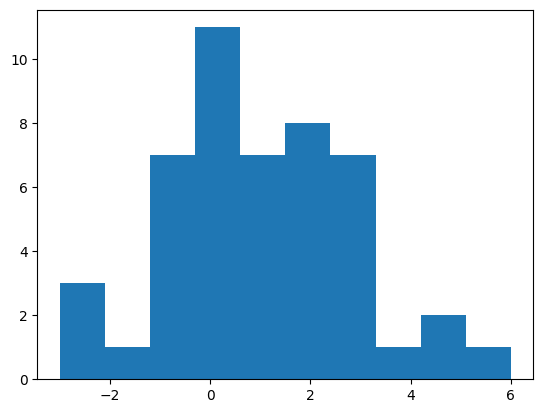

In [52]:
plt.hist(ar_results[:, 4, 0, 2])
plt.show()

In [53]:
t_statistic, p_value = stats.ttest_1samp(a=ar_results[:, 4, 0, 2], popmean=0) 
print(t_statistic , p_value)

3.235526476316856 0.00222622446392046
